## Exam 3 - CSCE 633 600 (Machine Learning)
## Name: Rohan Chaudhury
## UIN: 432001358

### Question: Clustering countries based on longitude and lattitude

In this exam we will focus on a clustering problem to group countries based on their geographical location.

We will be considering the longitude and latitude of 240 countries, as provided in "data.csv"
file on CANVAS. The rows of the file refer to the countries (i.e., samples) of the dataset. The
columns denote the country name (column 1), as well as the longitude (column 2) and latitude
(column 3) of each country.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import matplotlib
from scipy import linalg
import math

### (1) (3 points) Data visualization: Plot a 2-D scatter plot of the data. Provide explainations and insights regarding the resulting scatter plot.

In [17]:
file_train="data.csv"
train_rows =pd.read_csv(file_train)
print (train_rows.head())
print (" ")
print("Total no. of rows in data.csv: %d \n"%(len(train_rows)))
print (" ")
print("Total no. of colums in data.csv: %d \n"%(train_rows.shape[1]))

          name  Longitude   Latitude
0        Aruba -69.982677  12.520880
1  Afghanistan  66.004734  33.835231
2       Angola  17.537368 -12.293361
3     Anguilla -63.064989  18.223959
4      Albania  20.049834  41.142450
 
Total no. of rows in data.csv: 241 

 
Total no. of colums in data.csv: 3 



<Figure size 432x288 with 0 Axes>

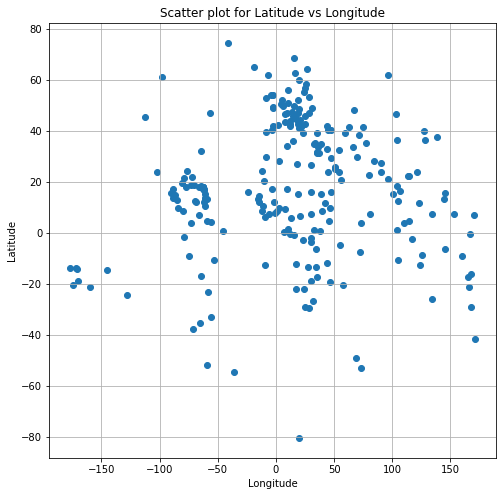

In [18]:
plt.figure(1)
plt.figure(figsize=(8, 8))
plt.scatter(x=train_rows.loc[:,'Longitude'],y=train_rows.loc[:,'Latitude'])
plt.xlabel(train_rows.columns[1])
plt.ylabel(train_rows.columns[2])
plt.title('Scatter plot for {} vs {}'.format (train_rows.columns[2],train_rows.columns[1]))
plt.grid()
plt.show()

### Answer:

A 2-D scatter plot of the data is shown above. The x-axis denotes the Longitude of the countries and the y-axis denotes the Latitude of the countries. Following observations can be made from the scatterplot:

1. We are able to see that some clusters have formed in the plot and the plot somewhat resembles a World Map. 


2. The clusters possibly denotes the major continents Asia, Africa, North America, South America, Europe, and Australia but the continent Antarctica may not be visible as a cluster in the scatter plot as it is only present as a single point at the bottom of the scatter plot.


3. By just seeing the scatter plot we can say that the:

    a. Cluster of countries between latitudes -10 to 60 and longitudes 75 to 175 might be depicting the continent Asia, 
    
    b. Cluster of countries between latitudes 25 to 70 and longitudes -25 to 75 might be depicting the continent Europe, 
    
    c. Cluster of countries between latitudes -30 to 25 and longitudes -25 to 75 might be depicting the continent Africa, 
    
    d. Cluster of countries between latitudes 0 to 65 and longitudes -125 to -25 might be depicting the continent North America, 
    
    e. Cluster of countries between latitudes -60 to 0 and longitudes -125 to -25 might be depicting the continent South America,
    
    f. Cluster of countries between latitudes -50 to -10 and longitudes 100 to 175 might be depicting the continent Australia
    
    
    
4. Since we are only considering 1 latitude and 1 longitude points for each country, all the countries are depicted as a single dot in the scatter plot. As such, we are not able to distinguish between countries with larger land mass area from countries with smaller land mass area and some countries with very large land mass area appear very far away from its neighbouring countries.


5. A good outcome of our clustering algorithms would be to cluster based on the continents present in our actual geographical map.

### (2) (5 points) K-Means Clustering: Apply K-Means clustering to group the samples of the dataset using K = 2, 3, 4, . . .  , 10. Provide the color-coded scatter plots for each K, where each color in the scatter plot represents a cluster.

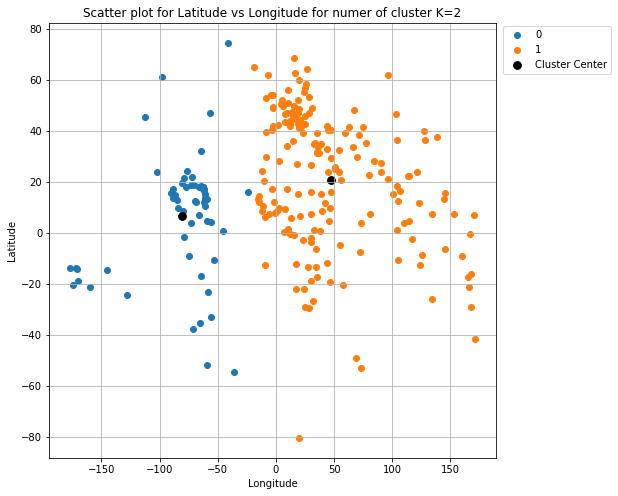

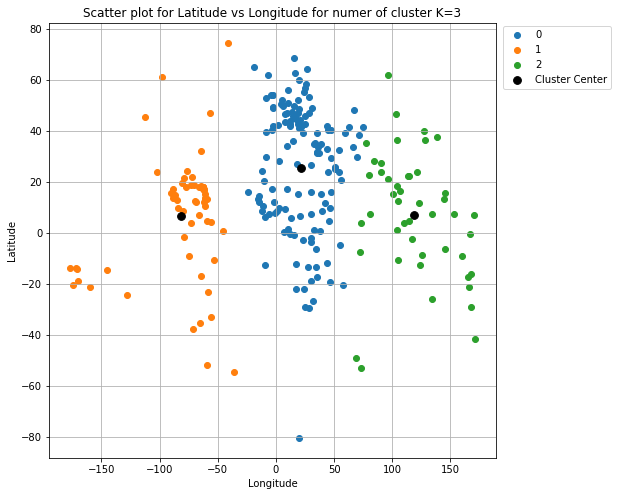

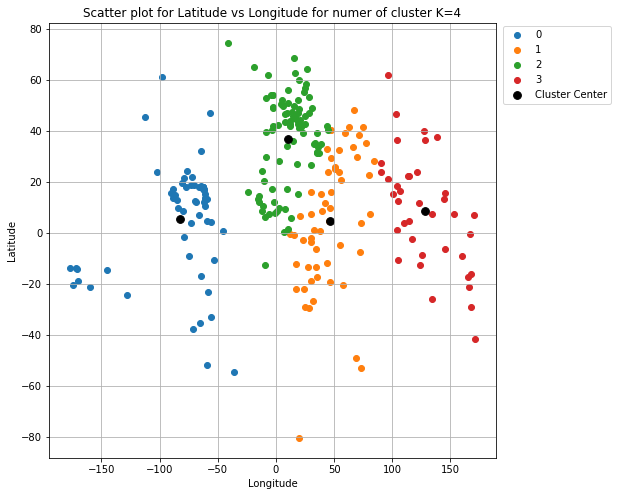

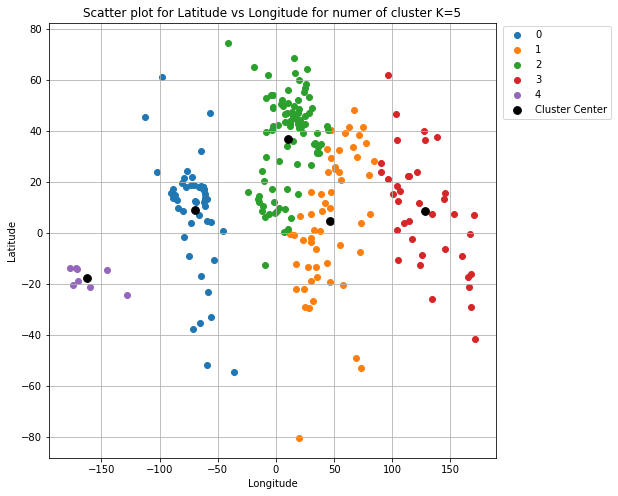

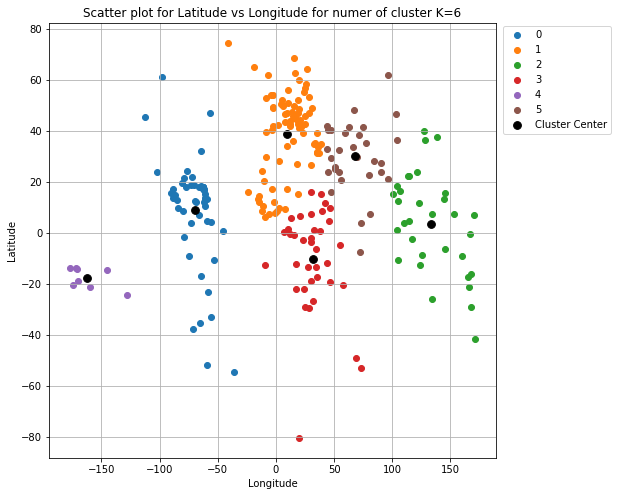

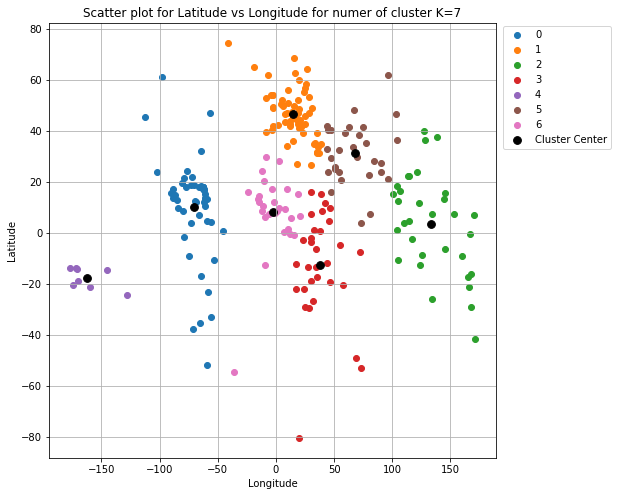

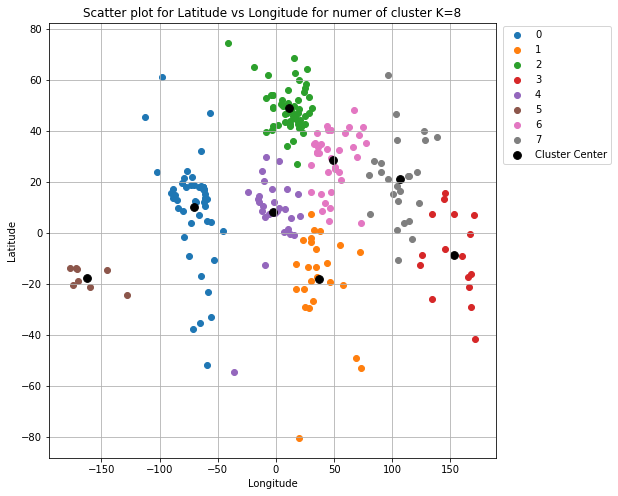

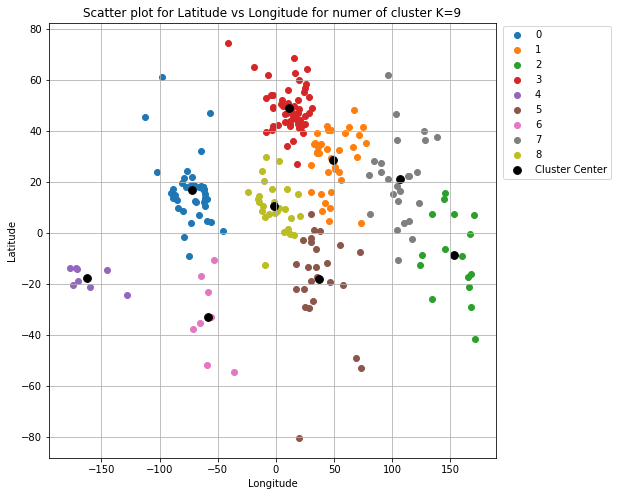

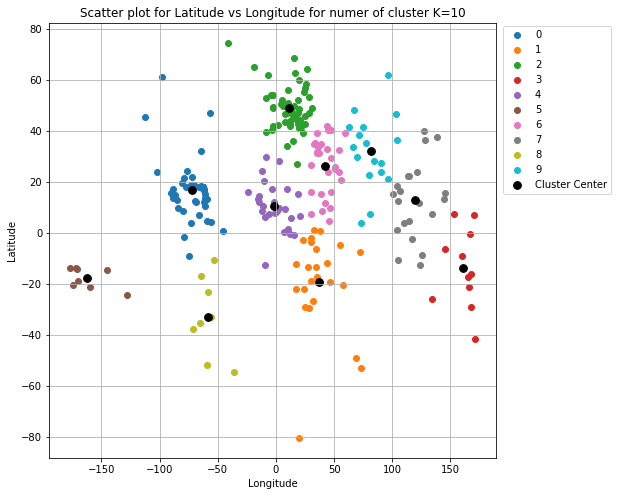

In [19]:
feature_set=['Longitude','Latitude']
X_matrix=train_rows.loc[:,feature_set]



for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_matrix)
    plt.figure(figsize=(8, 8))
    
    labels=set(kmeans.labels_)
    for k in labels:
        plt.scatter(X_matrix.iloc[kmeans.labels_ == k , 0] , X_matrix.iloc[kmeans.labels_ == k , 1] , label = k)
    plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], s=60, color='black',label='Cluster Center')
    plt.xlabel(train_rows.columns[1])
    plt.ylabel(train_rows.columns[2])
    plt.title('Scatter plot for {} vs {} for numer of cluster K={}'.format (train_rows.columns[2],train_rows.columns[1],i))
    plt.legend(bbox_to_anchor=(1.005,1.005), loc="upper left")
    plt.grid()
    plt.show()

### Answer:

K-Means clustering is applied to group the samples of the dataset using K = 2, 3, 4, . . . , 10. The color-coded scatter plots for each K is shown above, where each color in the scatter plot represents a cluster and the black colored dots represents the cluster centers.

### (3) (2 points) Elbow method for K-Means Clustering: Based on the scatter plots from question (2) and using the elbow method, determine and discuss the number of clusters that makes most sense for the data.

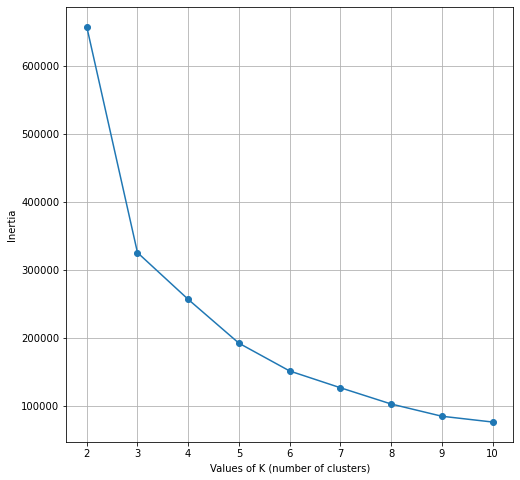

In [20]:
inertias=[]

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_matrix)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(range(2,11), inertias, '-o')
plt.xlabel('Values of K (number of clusters)')
plt.ylabel('Inertia');

### Answer:

The sum of squared distances of samples to their closest cluster center (also known as inertia) is used in the elbow method to choose an ideal value of k (number of clusters). We will choose a value of k where we see an inflection point in the above graph (graph of Inertia vs Values of k(number of clusters)) and the sum of squared distances begins to flatten out. When we are visualizing this graph, it looks somewhat like an elbow. The plot above shows that k = 3 is probably a good choice for the number of clusters as we can see an inflection point at k=3. Also, from all the above scatter plots we can see that k=3 can be a good choice, but k=4 and k=5 also seems like a good choice for the dataset. The scatter plot with number of clusters k=5 actually shows the clusters of the countries somewhat similar to the continents in the actual geographical map. So, based on both the elbow method and the scatter plots we can say that number of clusters k=3 is a good choice for the dataset but number of clusters k=5 is also a reasonable choice for the dataset.


### (4) (5 points) Clustering with Gaussian Mixture Models: Apply a Gaussian mixture models using 5 Gaussians to group the samples of the dataset. Report the mean and covariance of each Gaussian and briefly discuss these results. How does this clustering result compare to the one obtained by the K-Means algorithm? Please also examine and discuss the log-likelihood of a sample belonging to each Gaussian for 1-2 samples.

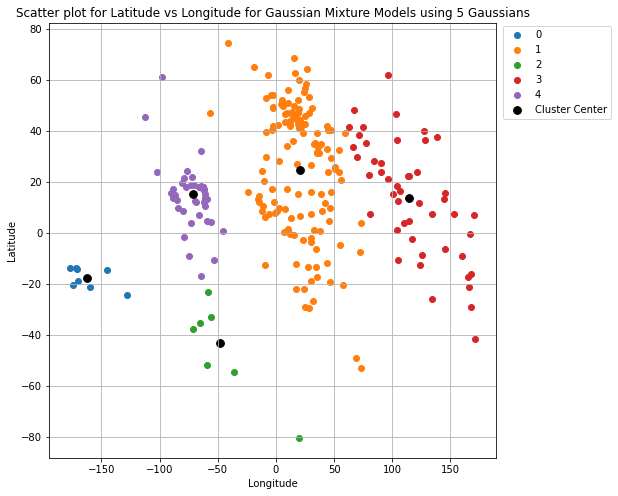

In [21]:
gm = GaussianMixture(n_components=5, random_state=0).fit(X_matrix)
plt.figure(figsize=(8, 8))
gm_labels=gm.predict(X_matrix)
unique_gm_labels=set(gm_labels)
for k in unique_gm_labels:
    plt.scatter(X_matrix.iloc[gm_labels == k , 0] , X_matrix.iloc[gm_labels == k , 1] , label = k)
plt.scatter(gm.means_[:,0] , gm.means_[:,1], s=60, color='black',label='Cluster Center')
plt.xlabel(train_rows.columns[1])
plt.ylabel(train_rows.columns[2])
plt.title('Scatter plot for {} vs {} for Gaussian Mixture Models using 5 Gaussians'.format (train_rows.columns[2],train_rows.columns[1]))
plt.legend(bbox_to_anchor=(1.005,1.005), loc="upper left")
plt.grid()
plt.show()

In [22]:
gm.means_

array([[-162.24442492,  -17.71540257],
       [  20.62831316,   24.5373979 ],
       [ -48.26747668,  -43.04897231],
       [ 114.58459723,   13.84023357],
       [ -71.46443327,   15.21720077]])

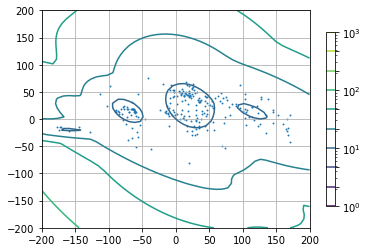

In [23]:
x = np.linspace(-200.0, 200.0)
y = np.linspace(-200.0, 200.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_matrix.iloc[:, 0], X_matrix.iloc[:, 1], 0.8)

plt.grid()
plt.show()

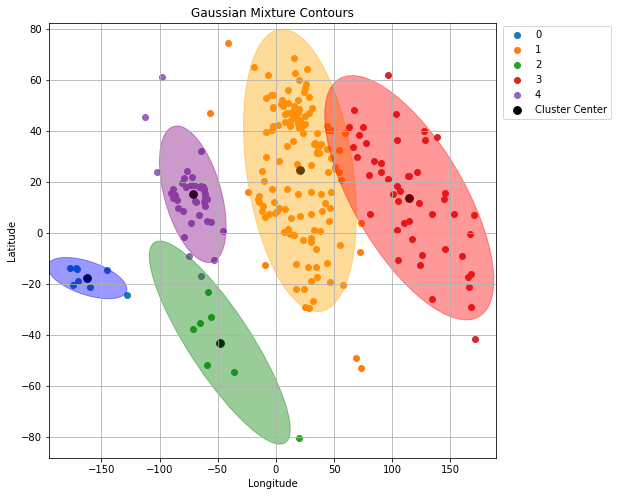

In [24]:

colors = ["blue", "orange", "green", "red", "purple"]

plt.figure(figsize=(8, 8))
plot = plt.subplot(1, 1, 1)

for i in unique_gm_labels:
    plt.scatter(X_matrix.iloc[gm_labels == i,0] , X_matrix.iloc[gm_labels == i,1] , label = i)
plt.scatter(gm.means_[:,0] , gm.means_[:,1], s=60, color='black',label='Cluster Center')


gm_details=zip(gm.means_, gm.covariances_,colors)


for mean, covariance, color in gm_details:
    
    ei1, ei2 = linalg.eigh(covariance)

    
    angle_ = 180.0 * (np.arctan((ei2[0] / 
                                 linalg.norm(ei2[0]))[1] / 
                                (ei2[0] / linalg.norm(ei2[0]))[0]))/ math.pi
    
    ellipse = matplotlib.patches.Ellipse(mean,
                                         (3.0 * np.sqrt(2.0) * np.sqrt(ei1))[0],
                                         (3.0 * np.sqrt(2.0) * np.sqrt(ei1))[1],
                                         180.0 + angle_, color=color)
    
    
    ellipse.set_alpha(0.40)
    
    plot.add_artist(ellipse)

plt.xlabel(train_rows.columns[1])
plt.ylabel(train_rows.columns[2])

plt.legend(bbox_to_anchor=(1.005,1.005), loc="upper left")

plt.title("Gaussian Mixture Contours")
plt.grid()
plt.show()
    


In [25]:
print ("Covariance matrices of the 5 Gaussians:")

gm.covariances_

Covariance matrices of the 5 Gaussians:


array([[[ 258.90774947,  -32.98698131],
        [ -32.98698131,   14.56896044]],

       [[ 522.43455765, -186.35551334],
        [-186.35551334,  681.98897893]],

       [[ 815.22488741, -457.78655183],
        [-457.78655183,  353.34637419]],

       [[1172.58596077, -522.81704476],
        [-522.81704476,  510.82490099]],

       [[ 182.31407452,  -80.9373846 ],
        [ -80.9373846 ,  159.50035891]]])

In [26]:
gm_values_Df = pd.DataFrame()
gm_values_Df['Label'] = [0,1,2,3,4]
gm_values_Df['Longitude Mean']=gm.means_[:,0]
gm_values_Df['Latitude Mean']=gm.means_[:,1]
gm_values_Df['Covariance'] = [x[0, 1] for x in gm.covariances_]
gm_values_Df['Variance_Longitude'] = [x[0, 0] for x in gm.covariances_]
gm_values_Df['Variance_Latitude'] = [x[1, 1] for x in gm.covariances_]

gm_values_Df

,Label,Longitude Mean,Latitude Mean,Covariance,Variance_Longitude,Variance_Latitude
0,0,-162.244425,-17.715403,-32.986981,258.907749,14.568960
1,1,20.628313,24.537398,-186.355513,522.434558,681.988979
2,2,-48.267477,-43.048972,-457.786552,815.224887,353.346374
3,3,114.584597,13.840234,-522.817045,1172.585961,510.824901
4,4,-71.464433,15.217201,-80.937385,182.314075,159.500359


### Answer:

The means and covariances associated with each Gaussian is shown in the table above. The 5 covariance matrices for each of the Gaussian is also printed above before the above table. The contours for each of the Gaussians (5 contours in total) are plotted in the scatter plot shown above before priniting the covariance matrices. Following observations can be made from the above plot and data:

1. The contours shape, skewness, size and tilt are determined by the values in its corresponding covariance matrixes and they look like ellipses for this dataset. 

2. The covariance matrix and its eigen vectors for each of the Gaussian describes:

    a. the major axis length of its corresponding ellipse contour, 
    
    b. minor axis length of its corresponding ellipse contour, 
    
    c. the angle of orientation of the ellipse with respect to the x-axis. 
    

3. All the covariance matrices are non-diagonal covariance matrices in this case (therefore the ellipses are tilted towards one side) and the values in the diagonals are not the same (hence they are skewed towards one direction). 

4. Since all the covariance values are negative, hence we can see that all the ellipses are tilted towards the left side. The magnitude of the covariances determines how much thinly peaked the distribution is. 

5. The means obtained from gm.means_ function gives the Longitude and Latitude positions of the cluster centers for each of the Gaussian as shown in the scatter plot.


When comparing this Gaussian Mixture Model with KMeans clustering for number of clusters K=5 we can see that:

1. The Gaussian Mixture Models using 5 Gaussians performs better as they consider the distribution cluster contours to be ellipses which almost perfectly fit the actual spread of the samples in the scatter plot whereas KMeans consider the cluster contours to be circles and thus the contours does not exactly fit the spread of the sample points in the scatter plot leaving room for errors in clustering because of extra space within the cluster circles.

2. The Gaussian Mixture Model has successfully clustered North America and South America (continents as per my assumption from the data) into 2 different clusters (denoted by purple and green colored clusters respectively) whereas KMeans clustering (with K=5) denotes both the continents together as a single cluster (denoted by cluster with blue colored sample points).

3. KMeans clustering (with K=5) was somewhat able to cluster Europe and Africa (continents as per my assumption from the data)  into 2 separate clusters (denoted by clusters with green and orange colored sample points respectively) whereas the Gaussian Mixture Model denotes them as a single orange colored cluster.

**Discussion regarding the log-likelihood of samples belonging to each Gaussian for 1-2 samples is provided below:**

In [27]:
#Randomly showing the log-likelihood of 2 samples from each Gaussian


for i in unique_gm_labels:
    log_likelihoods=gm.score_samples(X_matrix.iloc[gm_labels == i])
    print (log_likelihoods[:2])
    

[-9.59169683 -9.6936172 ]
[-9.95743755 -8.99143617]
[-11.14935857 -13.7944863 ]
[-10.31605427 -10.71270171]
[-8.55185492 -8.90566879]


In [28]:
#Manually picking 2,3 samples from each Gaussian (1 close to the Gaussian center and 1 far from the Gaussian center) 
#and showing their log-likelihood values for comparision 

# Pitcairn Is.   Cook Is.

# 'Burkina Faso','Libya'

# 'Antarctica','Chile'

# 'New Zealand','Cambodia'

# 'Canada','Dominican Rep.','Haiti'


In [29]:
## Calculating log likelihood and distance from cluster center for 2 samples belonging to Gaussian Cluster 0 

countries0=['Pitcairn Is.','Cook Is.']

log_likelihoods0=[]
distances0=[]
for country0 in countries0:
    Lat_long0=X_matrix.iloc[train_rows.index[train_rows['name']==country0].to_list()]
    log_likelihood0=gm.score_samples(Lat_long0)
    log_likelihoods0.append(log_likelihood0)
    distance0=np.sqrt((gm.means_[0][0]-Lat_long0['Longitude'])**2+(gm.means_[0][1]-Lat_long0['Latitude'])**2)
    distance0=distance0.values[0]
    distances0.append(distance0)
    
    
## Calculating log likelihood and distance from cluster center for 2 samples belonging to Gaussian Cluster 1 

    
countries1=['Burkina Faso','Libya']

log_likelihoods1=[]
distances1=[]
for country1 in countries1:
    Lat_long1=X_matrix.iloc[train_rows.index[train_rows['name']==country1].to_list()]
    log_likelihood1=gm.score_samples(Lat_long1)
    log_likelihoods1.append(log_likelihood1)
    distance1=np.sqrt((gm.means_[1][0]-Lat_long1['Longitude'])**2+(gm.means_[1][1]-Lat_long1['Latitude'])**2)
    distance1=distance1.values[0]
    distances1.append(distance1)

    
## Calculating log likelihood and distance from cluster center for 2 samples belonging to Gaussian Cluster 2 

countries2=['Antarctica','Chile']

log_likelihoods2=[]
distances2=[]
for country2 in countries2:
    Lat_long2=X_matrix.iloc[train_rows.index[train_rows['name']==country2].to_list()]
    log_likelihood2=gm.score_samples(Lat_long2)
    log_likelihoods2.append(log_likelihood2)
    distance2=np.sqrt((gm.means_[2][0]-Lat_long2['Longitude'])**2+(gm.means_[2][1]-Lat_long2['Latitude'])**2)
    distance2=distance2.values[0]
    distances2.append(distance2)

## Calculating log likelihood and distance from cluster center for 2 samples belonging to Gaussian Cluster 3
    

countries3=['New Zealand','Cambodia']

log_likelihoods3=[]
distances3=[]
for country3 in countries3:
    Lat_long3=X_matrix.iloc[train_rows.index[train_rows['name']==country3].to_list()]
    log_likelihood3=gm.score_samples(Lat_long3)
    log_likelihoods3.append(log_likelihood3)
    distance3=np.sqrt((gm.means_[3][0]-Lat_long3['Longitude'])**2+(gm.means_[3][1]-Lat_long3['Latitude'])**2)
    distance3=distance3.values[0]
    distances3.append(distance3)

## Calculating log likelihood and distance from cluster center for 3 samples belonging to Gaussian Cluster 4 

    
countries4=['Canada','Dominican Rep.', 'Haiti']

log_likelihoods4=[]
distances4=[]
for country4 in countries4:
    Lat_long4=X_matrix.iloc[train_rows.index[train_rows['name']==country4].to_list()]
    log_likelihood4=gm.score_samples(Lat_long4)
    log_likelihoods4.append(log_likelihood4)
    distance4=np.sqrt((gm.means_[4][0]-Lat_long4['Longitude'])**2+(gm.means_[4][1]-Lat_long4['Latitude'])**2)
    distance4=distance4.values[0]
    distances4.append(distance4)
    

In [30]:

for i in range(len(distances0)):
    print ('From countries belonging to Gaussian 0, distance of the country sample point of \'{}\' from the mean of the Gaussian (Gaussian cluster center point) is {} and its log likelihood is {}'.
           format(countries0[i],distances0[i],log_likelihoods0[i]))
print(" ")
print(" ")
for i in range(len(distances1)):
    print ('From countries belonging to Gaussian 1, distance of the country sample point of \'{}\' from the mean of the Gaussian (Gaussian cluster center point) is {} and its log likelihood is {}'.
           format(countries1[i],distances1[i],log_likelihoods1[i]))
print(" ")
print(" ")    
for i in range(len(distances2)):
    if countries2[i]=='Antarctica':
        print ('From samples belonging to Gaussian 2, distance of the continent sample point of \'{}\' from the mean of the Gaussian (Gaussian cluster center point) is {} and its log likelihood is {}'.
               format(countries2[i],distances2[i],log_likelihoods2[i]))
    else:
        print ('From countries belonging to Gaussian 2, distance of the country sample point of \'{}\' from the mean of the Gaussian (Gaussian cluster center point) is {} and its log likelihood is {}'.
               format(countries2[i],distances2[i],log_likelihoods2[i]))
print(" ")
print(" ")    
for i in range(len(distances3)):
    print ('From countries belonging to Gaussian 3, distance of the country sample point of \'{}\' from the mean of the Gaussian (Gaussian cluster center point) is {} and its log likelihood is {}'.
           format(countries3[i],distances3[i],log_likelihoods3[i]))
print(" ")
print(" ")    
for i in range(len(distances4)):
    print ('From countries belonging to Gaussian 4, distance of the country sample point of \'{}\' from the mean of the Gaussian (Gaussian cluster center point) is {} and its log likelihood is {}'.
           format(countries4[i],distances4[i],log_likelihoods4[i]))

From countries belonging to Gaussian 0, distance of the country sample point of 'Pitcairn Is.' from the mean of the Gaussian (Gaussian cluster center point) is 34.572887192893134 and its log likelihood is [-11.67386582]
From countries belonging to Gaussian 0, distance of the country sample point of 'Cook Is.' from the mean of the Gaussian (Gaussian cluster center point) is 4.279585731750979 and its log likelihood is [-9.6936172]
 
 
From countries belonging to Gaussian 1, distance of the country sample point of 'Burkina Faso' from the mean of the Gaussian (Gaussian cluster center point) is 25.52437374679738 and its log likelihood is [-9.59204321]
From countries belonging to Gaussian 1, distance of the country sample point of 'Libya' from the mean of the Gaussian (Gaussian cluster center point) is 3.616676752501194 and its log likelihood is [-8.78656721]
 
 
From samples belonging to Gaussian 2, distance of the continent sample point of 'Antarctica' from the mean of the Gaussian (Gaussi

### Answer Continued:

Following has been done to discuss the log-likelihood of the samples from each Gaussian:

1. I have randomly shown the log-likelihood of 2 samples from each Gaussian, then

2. I have manually picked 2 samples from each Gaussian (1 close to the Gaussian center and 1 far from the Gaussian center) and 1 extra sample in Gaussian number 4 and printed their log-likelihood values for comparision. They are as follows:

    a. 
        1. From countries belonging to Gaussian 0, distance of the country sample point of 'Pitcairn Is.' from the mean of the Gaussian (Gaussian cluster center point) is 34.572887192893134 and its log likelihood is [-11.67386582]

        2. From countries belonging to Gaussian 0, distance of the country sample point of 'Cook Is.' from the mean of the Gaussian (Gaussian cluster center point) is 4.279585731750979 and its log likelihood is [-9.6936172]
 
 
    b.
        1. From countries belonging to Gaussian 1, distance of the country sample point of 'Burkina Faso' from the mean of the Gaussian (Gaussian cluster center point) is 25.52437374679738 and its log likelihood is [-9.59204321]

        2. From countries belonging to Gaussian 1, distance of the country sample point of 'Libya' from the mean of the Gaussian (Gaussian cluster center point) is 3.616676752501194 and its log likelihood is [-8.78656721]
 
 
    c. 
        1. From samples belonging to Gaussian 2, distance of the continent sample point of 'Antarctica' from the mean of the Gaussian (Gaussian cluster center point) is 77.80040297546995 and its log likelihood is [-13.7944863]

        2. From countries belonging to Gaussian 2, distance of the country sample point of 'Chile' from the mean of the Gaussian (Gaussian cluster center point) is 23.719002724795555 and its log likelihood is [-11.59006711]
 
 
    d. 
        1. From countries belonging to Gaussian 3, distance of the country sample point of 'New Zealand' from the mean of the Gaussian (Gaussian cluster center point) is 79.5909669285192 and its log likelihood is [-12.81796636]

        2. From countries belonging to Gaussian 3, distance of the country sample point of 'Cambodia' from the mean of the Gaussian (Gaussian cluster center point) is 9.742268813563724 and its log likelihood is [-9.87708377]
 
 
    e. 
        1. From countries belonging to Gaussian 4, distance of the country sample point of 'Canada' from the mean of the Gaussian (Gaussian cluster center point) is 53.38457711789225 and its log likelihood is [-15.24490197]

        2. From countries belonging to Gaussian 4, distance of the country sample point of 'Dominican Rep.' from the mean of the Gaussian (Gaussian cluster center point) is 3.8000626366964187 and its log likelihood is [-8.59962589]
        
        3. From countries belonging to Gaussian 4, distance of the country sample point of 'Haiti' from the mean of the Gaussian (Gaussian cluster center point) is 3.9131415034955506 and its log likelihood is [-8.57392626]
        
        
        
**From the above values we can see that the log-likelihood of a sample is more for a sample which is closer to the mean of the Gaussian (Gaussian cluster center point) than for a sample which is far away from the the mean of the Gaussian. That is, the log-likelihood of a sample point increases as the distance of the sample point from the Gaussian cluster center decreases. For example, in case of Gaussian 3, 'Cambodia' which is closer to the Gaussian cluster center (Distance= 9.7422) has a log-likelihood of -9.877 which is greater than the log-likelihood of 'New Zealand' (log-likelihood= -12.817) as it is farther away from the Gaussian Cluster Center (distance= 79.5909).**

**Also, it can be seen that, for sample points which are almost at the same distance from its Gaussian cluster center have almost same log-likelihood values. For example, in case of Gaussian 4, sample points 'Dominican Rep.' and 'Haiti' are almost at the same distance from the mean of Gaussian 4 (distance=3.800 and 3.913 respectively) and they have almost same log-likelihood values(log-likelihood=-8.599 and -8.573 respectively).**
